# Trabalho 2 - Aprendizado Não Supervisionado

## Professor: Paulo Cotta

### Ideia do trabalho


Aprendizado não supervisionado para detecção de anomalias no preço das ações.
Temos um .csv que é o nosso dataset (conjunto de dados).

License of dataset: Anomaly detection in stock options pricing - MIT

In [44]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
seaborn.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("data.csv")
data.tail()

,Unnamed: 0,UnderlyingPrice,OptionSymbol,Type,Expiration,DataDate,Strike,Last,Bid,Ask,...,OpenInterest,T1OpenInterest,IVMean,IVBid,IVAsk,Delta,Gamma,Theta,Vega,AKA
853,853,174.09,GS180119P00270000,put,01/19/2018,01/05/2016,270.0,84.6,94.50,99.45,...,6,6,0.1835,0.0000,0.2409,-0.9387,0.0027,-0.0037,0.3013,GS180119P00270000
854,854,174.09,GS180119C00280000,call,01/19/2018,01/05/2016,280.0,0.0,1.19,2.55,...,0,0,0.2162,0.1981,0.2342,0.0830,0.0028,-0.0055,0.3800,GS180119C00280000
855,855,174.09,GS180119P00280000,put,01/19/2018,01/05/2016,280.0,0.0,104.00,108.90,...,0,0,0.1800,0.0000,0.2434,-0.9573,0.0020,-0.0027,0.2259,GS180119P00280000
856,856,174.09,GS180119C00290000,call,01/19/2018,01/05/2016,290.0,0.0,0.76,1.90,...,0,0,0.2117,0.1930,0.2304,0.0622,0.0023,-0.0043,0.3045,GS180119C00290000
857,857,174.09,GS180119P00290000,put,01/19/2018,01/05/2016,290.0,0.0,114.00,118.90,...,0,0,0.1811,0.0000,0.2557,-0.9674,0.0016,-0.0022,0.1812,GS180119P00290000


In [3]:
data.describe()

,Unnamed: 0,UnderlyingPrice,Strike,Last,Bid,Ask,Volume,OpenInterest,T1OpenInterest,IVMean,IVBid,IVAsk,Delta,Gamma,Theta,Vega
count,858.000000,8.580000e+02,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,428.500000,1.740900e+02,186.463869,9.109988,20.894744,22.509755,20.349650,376.848485,384.405594,0.630892,0.159149,0.590690,-0.078274,0.008780,-0.077531,0.150592
std,247.827561,2.673199e-12,47.751953,19.266645,27.679726,29.122069,86.925383,1512.931102,1513.398965,2.198250,0.153752,0.517986,0.635420,0.010845,0.251748,0.214616
min,0.000000,1.740900e+02,80.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.054600,0.000000,0.216900,-0.997000,0.000000,-3.366600,0.000000
25%,214.250000,1.740900e+02,152.500000,0.000000,0.360000,0.472500,0.000000,0.000000,0.000000,0.264750,0.000000,0.291025,-0.710300,0.001900,-0.069675,0.018050
50%,428.500000,1.740900e+02,185.000000,0.350000,7.925000,8.700000,0.000000,7.000000,9.000000,0.320950,0.214300,0.383200,0.001100,0.004700,-0.028850,0.062200
75%,642.750000,1.740900e+02,217.500000,7.662500,32.337500,35.800000,2.000000,136.500000,141.750000,0.451050,0.271050,0.634250,0.289025,0.011175,-0.012800,0.175275
max,857.000000,1.740900e+02,310.000000,113.000000,134.000000,138.800000,933.000000,21595.000000,21567.000000,37.111400,0.721600,3.242900,1.000000,0.079600,0.001000,0.991800


##### *Questão 1*

Quais são os dados de preços das ações no conjunto de dados? Explique e apresente abaixo apenas as colunas que contém tais dados.

In [7]:
# coloque o código aqui
# os dados dos preços das ações são Bid, Ask, Strike, UnderlyingPrice, Delta e Gamma
options_df = data
it_X_train = options_df[['Strike', 'Delta', 'Gamma']]
it_X_train['s_k'] = options_df['UnderlyingPrice'] - options_df['Strike']
it_X_train['b_a_mean'] = (options_df['Bid'] + options_df['Ask']) / 2
it_X_train['b_a_mean'] = it_X_train['b_a_mean'].apply(lambda x: int(round(x, 0)))
it_X_train['s_k'] = it_X_train['s_k'].apply(lambda x: int(round(x, 0)));

#### *Questão 2*

*Aprendizado não supervisionado para encontrar discrepâncias (anomalias)*

Explique:

O que seria uma anomalia no dataset?

Para fins de detecção de anomalias, utilize algum algoritmo de aprendizado não supervisionado para identificar os cluster dos dados.

Exemplos de algoritmos não supervisionados:
- Isolation Forest
- K-Means
- KNN
- Randon Forest
- entre outros.

Apresente o código e detalhe, explicando a arquitetura criada/selecionada, além de apresentar dados de visualização (Data visualization [Utilizando Numpy, Pandas e Matplotlib]).

In [45]:
# Um preço de Bid de duas opções "call" que tem o mesmo Strike deveriam ser bem próximos, 
# uma diferença muito grande nesse preço seria considerado uma anomalia
# usarei nesse experimento a Isolation Forest

In [39]:
it_X_train.head()

,Strike,Delta,Gamma,s_k,b_a_mean
0,125.0,1.0000,0.0000,49,49
1,125.0,-0.0150,0.0014,49,0
2,130.0,1.0000,0.0000,44,44
3,130.0,-0.0175,0.0017,44,0
4,135.0,1.0000,0.0000,39,39


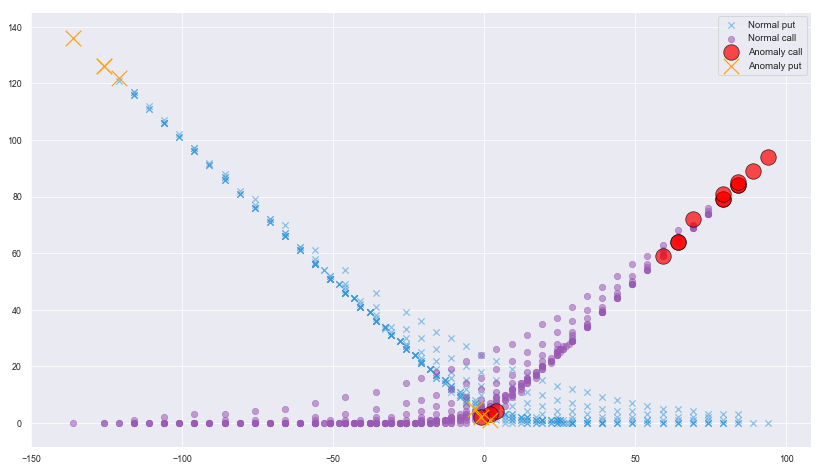

In [46]:
clf = IsolationForest(max_samples='auto', contamination=.025,\
                      n_estimators=10, \
                      random_state=1234, max_features=it_X_train.shape[1])
clf.fit(it_X_train)

y_pred_train = clf.predict(it_X_train)
it_X_train['y'] = y_pred_train
it_X_train['Type'] = options_df['Type']
it_outlier = -1

sns_options_colors = ["#9b59b6", "#3498db"]
sns.set_palette(sns.color_palette(sns_options_colors))
sns.set_context("paper", rc={"axes.labelsize": 10})
plt.figure(figsize=(14, 8))

it_x_ = 's_k'
it_y_ = 'b_a_mean'


plt.scatter(it_X_train[(it_X_train['y']==1) & (it_X_train['Type']=='put')][it_x_], \
            it_X_train[(it_X_train['y']==1) & (it_X_train['Type']=='put')][it_y_], \
            label='Normal put', c=sns_options_colors[1], s=10*4, alpha=.55, marker='x')

plt.scatter(it_X_train[(it_X_train['y']==1) & (it_X_train['Type']=='call')][it_x_], \
            it_X_train[(it_X_train['y']==1) & (it_X_train['Type']=='call')][it_y_], \
            label='Normal call', c=sns_options_colors[0], s=10*4, alpha=.55, marker='o')

plt.scatter(it_X_train[(it_X_train['y']==-1) & (it_X_train['Type']=='call')][it_x_], \
            it_X_train[(it_X_train['y']==-1) & (it_X_train['Type']=='call')][it_y_], \
            label='Anomaly call', c='red', s=60*4, edgecolor='black', marker='o', alpha=.7)

plt.scatter(it_X_train[(it_X_train['y']==-1) & (it_X_train['Type']=='put')][it_x_], \
            it_X_train[(it_X_train['y']==-1) & (it_X_train['Type']=='put')][it_y_], \
            label='Anomaly put', c='orange', s=60*4, edgecolor='black', marker='x')

plt.legend(fontsize='medium')

plt.show()

In [47]:
it_X_train.head()

,Strike,Delta,Gamma,s_k,b_a_mean,y,Type
0,125.0,1.0000,0.0000,49,49,1,call
1,125.0,-0.0150,0.0014,49,0,1,put
2,130.0,1.0000,0.0000,44,44,1,call
3,130.0,-0.0175,0.0017,44,0,1,put
4,135.0,1.0000,0.0000,39,39,1,call
